<a href="https://colab.research.google.com/github/AkshayLunawat/Internship_Project/blob/master/Intership_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Code is Developed by Akshay Lunawat

**Problem Stament**

In the earlier campaign, Out of 5000 customers only 480 customers accepted the personal loan and now the bank want to increase the ratio of their loan business to increase profits by the interests. So , the bank wants to convert the liability based customers to personal loan customers. Earlier bank has conducted a  campaign on libality based customers that showed a healthy conversion rate of over 9% success. Now, the bank want to develop a model which will find the potential cutomers who have higher possiblities of purchasing loan.

**Step 1.1 Importing the required Libraries.**

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Step 1.2 Importing Dataset**

In [76]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [77]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Step 1.3 Identifying Shape of Dataset**

In [78]:
data.shape

(5000, 14)

**Step 1.4 Check Datatype**

In [79]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Step 1.5 Statistical Summary**

In [80]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Step 1.6 Identfying Null Values**

In [81]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Step 1.7 Identfying Unique Values**

In [82]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Step 2.1 Check if data need to cleaned for any of the variables**

So by analysing, we can distribute the attributes in a way such as,

ID - Id does not provide any information to our personal loan and also it doesn't provide anything for our future conclusion. So we can neglet this attributee. 

So by analysing **unique record** we can see that there are 5 attributes that are in the binary form.

Personal Loan - Did the customer accepted the personal loan ? This is our target variable.

Securities Account - Does the customer have a securities account ?

CD Account - Does the customer have a certificate of deposit (CD) account ?

Online - Does the customer use internet banking facilities ?

Credit Card - Does the customer use a credit card ?

And same form unique we can see,

Family and Education are Ordinal Categorical Variables.

While Zip Code is related to area its a nominal variable.

In [83]:
#Removing Id Attribute
data = data.drop(['ID'],axis=1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Step 2.2 Cleaning Negative Experience**

There are some records with negative experience. So we have to remove it first to make data consistent.

In [84]:
#Count how much negative experience are there.
data[data['Experience'] < 0]['Experience'].count()

52

In [85]:
#Taking median value of Experience column, to remove negative values
data.loc[data.Experience<0,'Experience'] = data['Experience'].median(axis = 0)
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Step 3.1 Number of unique in Each column**

Already done in step 1.7

**Step 3.2 Number of people with zero mortgage**


In [86]:
#people with zero mortgage count
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

**Step 3.3 Number of people with zero credit card spending per month**

In [87]:
temp = data[data['CreditCard'] == 0]
temp[temp['CCAvg'] > 0]['CCAvg'].count()

3452

**Step 3.4 Value counts of all categorical columns.**


In [88]:
data[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']].apply(pd.Series.value_counts)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,NaN,NaN,4520.0,4478.0,4698.0,2016.0,3530.0
1,1472.0,2096.0,480.0,522.0,302.0,2984.0,1470.0
2,1296.0,1403.0,NaN,NaN,NaN,NaN,NaN
3,1010.0,1501.0,NaN,NaN,NaN,NaN,NaN
4,1222.0,NaN,NaN,NaN,NaN,NaN,NaN


**Step 3.5 Univariate and Bivariate analysis**


0    4520
1     480
Name: Personal Loan, dtype: int64


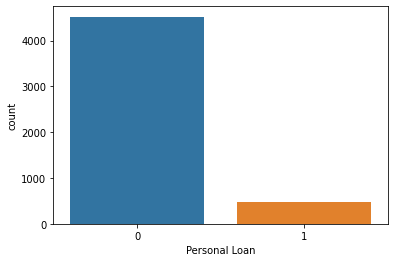

In [89]:
#Personal Loan
print(data['Personal Loan'].value_counts())
sns.countplot(x = 'Personal Loan', data = data)

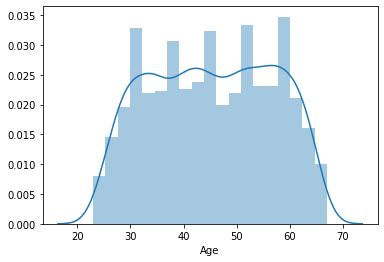

In [90]:
#Age
sns.distplot(data['Age'])

Age - Majority of customers falls under 30 and 60 years of age group. We can confirm this by looking at the plot.

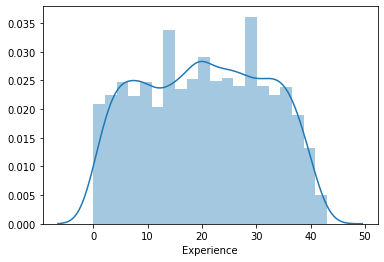

In [91]:
#Experience
sns.distplot(data['Experience'])

Experience - Experience is also normally distributed.

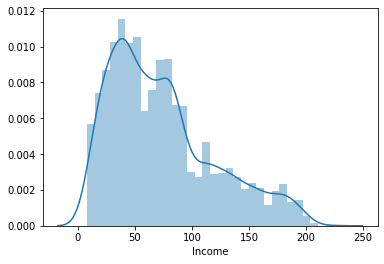

In [92]:
#Income
sns.distplot(data['Income'])

Income - Income is positively skewed.

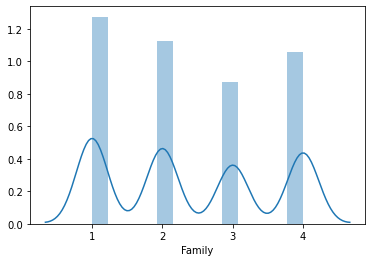

In [93]:
#Family
sns.distplot(data['Family'])

Family - The is uniformaly distrubuted. Data points are more with family size 1 and 2.

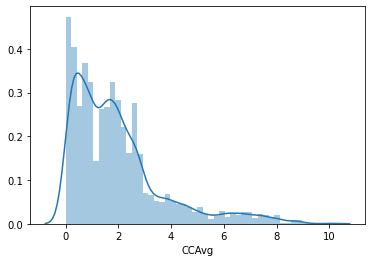

In [94]:
#CCAvg
sns.distplot(data['CCAvg'])

CCAvg - The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.

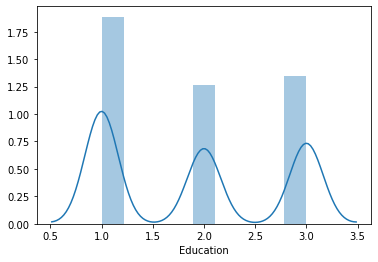

In [95]:
#Education
sns.distplot(data['Education'])

Education - Undergrad level customers are more than the Graduate and Advanced/Professional customers.

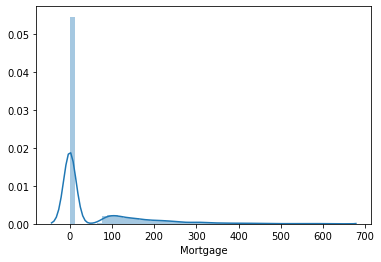

In [96]:
#Mortgage
sns.distplot(data['Mortgage'])

Mortgage - The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage.

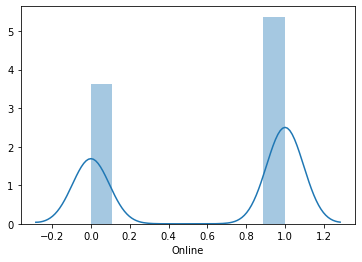

In [97]:
#Online
sns.distplot(data['Online'])

Online - This is a Bernoulli Distrubution. Number of customers who have Online accout is geater than the number of customers who do not have online account

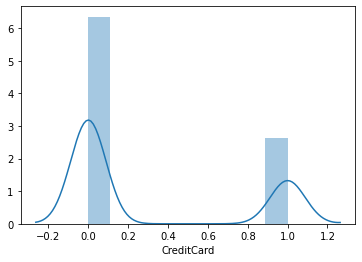

In [98]:
#Credit Card
sns.distplot(data['CreditCard'])

Credit Card -It is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


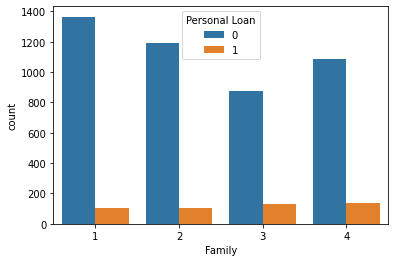

In [99]:
#Family
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'Family', aggfunc = 'size'))
sns.countplot(x = 'Family', data = data, hue = 'Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


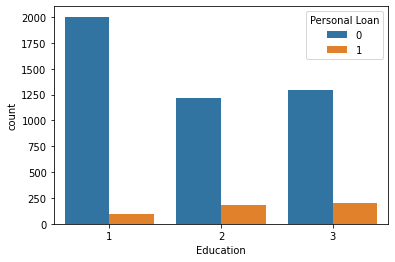

In [100]:
#Education
print(pd.pivot_table(data = data, index = 'Personal Loan',columns = 'Education', aggfunc = 'size'))
sns.countplot(x='Education', data = data, hue = 'Personal Loan')

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


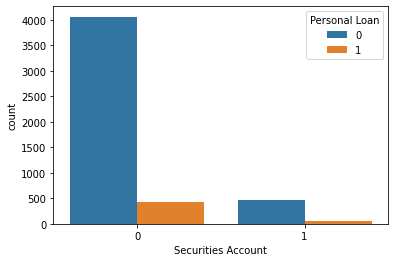

In [101]:
#Securities Account
print(pd.pivot_table(data = data, index='Personal Loan', columns='Securities Account', aggfunc='size'))
sns.countplot(x = 'Securities Account', data = data, hue = 'Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


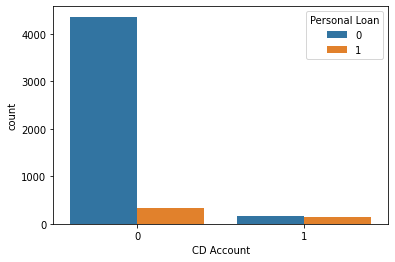

In [102]:
#CD Account
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'CD Account', aggfunc = 'size'))
sns.countplot( x = 'CD Account', data = data, hue = 'Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


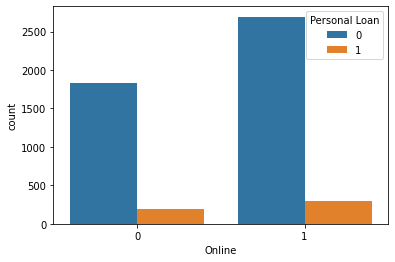

In [103]:
#Online
print(pd.pivot_table(data = data, index = 'Personal Loan', columns='Online', aggfunc='size'))
sns.countplot( x = 'Online', data = data, hue = 'Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


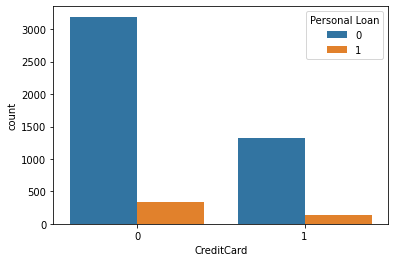

In [104]:
#CreditCard
print(pd.pivot_table(data = data, index = 'Personal Loan', columns = 'CreditCard', aggfunc='size'))
sns.countplot( x = 'CreditCard', data = data, hue = 'Personal Loan')

**Step 3.6 Identify Correalted Variables**

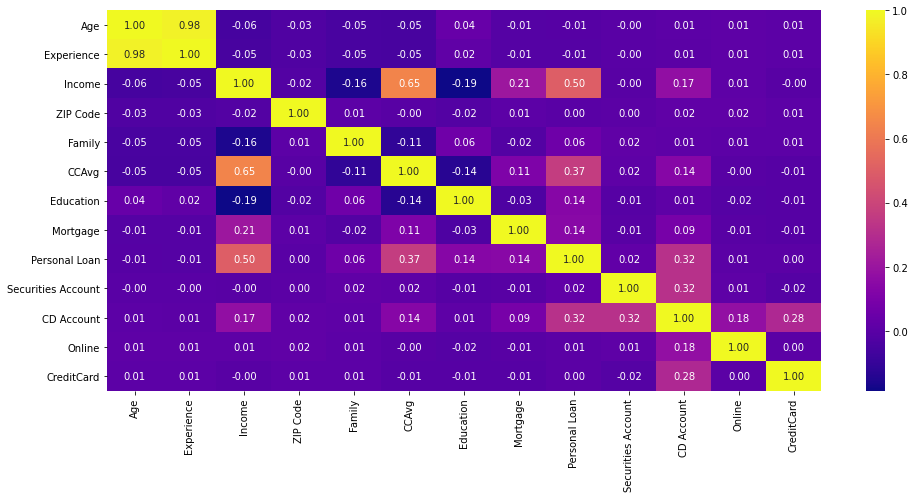

In [105]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(),cmap='plasma',annot=True,fmt='.2f')


1. Age and Experience are highly correlated and the correlation is almost 1
2. 'Income' and 'CCAvg' is moderately correlated.
3. Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

**Step 4 Apply necessary transformations for the feature variables**

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [107]:
#drop zipcode, doesn't found relevant
data = data.drop(['ZIP Code'], axis=1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**Step 4.1 Seperating Target Variable from Independent Variables from Data**

In [153]:
copy_data = data
X_data = copy_data.drop('Personal Loan', axis=1).astype('int64')
Y_data = copy_data[['Personal Loan']].astype('int64')

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X_data).astype('int64')
y = scaler.fit_transform(Y_data).astype('int64')

**Step 5 Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [163]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 11) (1500, 11) (3500, 1) (1500, 1)


**Step 6 Use the Logistic Regression model to predict the likelihood of a customer buying personal loans**

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
#Predication
y_predict = logreg.predict(x_test)


**Step 7. Print all the metrics related for evaluating the model performance**

In [171]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict)))

Accuracy of logistic regression classifier on test set: 0.95


In [174]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
print('\nTrue Possitive    = ', confusion_matrix[1][1])
print('True Negative     = ',   confusion_matrix[0][0])
print('False Possive     = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])

[[1354   18]
 [  60   68]]

True Possitive    =  68
True Negative     =  1354
False Possive     =  18
False Negative    =  60


From the above accuracy results we see that accuracy is **94.8%**